# Spark SQL, DataFrames and Datasets

https://spark.apache.org/docs/latest/sql-programming-guide.html
    
https://spark.apache.org/docs/2.1.0/sql-programming-guide.html
    
We talk about SparkSession for Spark DataFrame and Dataset.

# Dataset, and Dataframe Starting Point: SparkSession

https://spark.apache.org/docs/latest/sql-getting-started.html

A Dataset/Dataframe is a distributed collection of data like database.   

The entry point into all functionality in Spark is the SparkSession class. 

To create a basic SparkSession, just use SparkSession.builder:

In [7]:
# SparkSession

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# SparkSession.read_csv()

https://spark.rstudio.com/reference/spark_read_csv

# DataFrame Operations

In Python it’s possible to access a DataFrame’s columns either by attribute (df.age) or by indexing (df['age']). 

While the former is convenient for interactive data exploration, 
users are highly encouraged to use the latter form, which is future proof and
won’t break with column names that are also attributes on the DataFrame class.

https://spark.apache.org/docs/latest/sql-getting-started.html
    
SparkSession.printSchema():

Prints the schema to the console in a nice tree format. 

PrintSchema(Int32) Prints the schema up to the given level to the console in a nice tree format.

# stock.csv

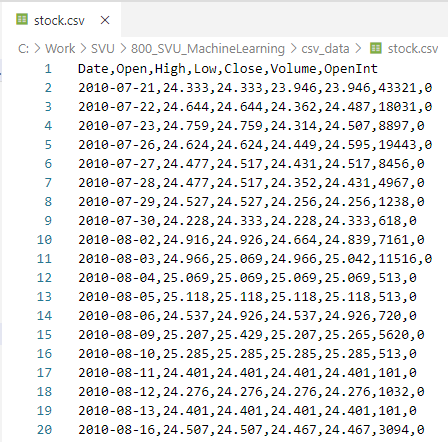

In [18]:
# https://spark.apache.org/docs/2.1.0/sql-programming-guide.html#datasets-and-dataframes
import pandas as df
import pyspark as spark
from pyspark.sql import SparkSession
print('SparkSession:')
print(SparkSession)
print()
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("sparl.some.cofig.option", "some-value") \
        .getOrCreate()
df = spark.read.csv('../csv_data/stock.csv')
# PrintSchema(Int32) Prints the schema (outline) up to the given level to the 
# console in a nice tree format.
print(df.printSchema())
print()

SparkSession:
<class 'pyspark.sql.session.SparkSession'>

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)

None



# SparkSession.head()

Print the column header in dataset.

In [11]:
import pyspark as spark
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("sparl.some.cofig.option", "some-value") \
        .getOrCreate()
df = spark.read.csv('../csv_data/stock.csv')
#print(df.printSchema())
#print()
print('df.head():')
print(df.head())

df.head():
Row(_c0='Date', _c1='Open', _c2='High', _c3='Low', _c4='Close', _c5='Volume', _c6='OpenInt')


# Count()

Count How many row in dataset.

In [12]:
import pyspark as spark
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("sparl.some.cofig.option", "some-value") \
        .getOrCreate()
df = spark.read.csv('../csv_data/stock.csv')
print('df.count():')
print(df.count())

df.count():
1566


# SparkSession.decribes().show()

Display statistics of dataset.

In [13]:
import pyspark as spark
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("sparl.some.cofig.option", "some-value") \
        .getOrCreate()
df = spark.read.csv('../csv_data/stock.csv')
print('df.describe().show():')
print(df.describe().show())

df.describe().show():
+-------+----------+-----------------+-----------------+------------------+------------------+------------------+-------+
|summary|       _c0|              _c1|              _c2|               _c3|               _c4|               _c5|    _c6|
+-------+----------+-----------------+-----------------+------------------+------------------+------------------+-------+
|  count|      1566|             1566|             1566|              1566|              1566|              1566|   1566|
|   mean|      null|36.01455015974442|36.13712006389782|35.855319233226936|35.987516549520834| 6452.979552715655|    0.0|
| stddev|      null|6.957746952361967|7.002547881920358| 6.878263634785327| 6.933813920617953|12047.101114447823|    0.0|
|    min|2010-07-21|           23.936|           23.946|            23.867|            23.946|              1001|      0|
|    max|      Date|             Open|             High|               Low|             Close|            Volume|OpenInt|
+-

# SparSession.dropna().count()

Drop NA and then count how many row. 

In [14]:
import pyspark as spark
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("sparl.some.cofig.option", "some-value") \
        .getOrCreate()
df = spark.read.csv('../csv_data/stock.csv')
# Remove the NUll Value.
print('df.dropna().count():')
print(df.dropna().count())

df.dropna().count():
1566


# SparkSession.fillna(-1).show(5)

- Fillena(-1): Fill na with -1
- Display 5 lines

In [15]:
import pyspark as spark
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("sparl.some.cofig.option", "some-value") \
        .getOrCreate()
df = spark.read.csv('../csv_data/stock.csv')
# Remove the NUll Value to -1.
# we do not have NULL value.
print('df.fillna(-1).show(5):')
print(df.fillna(-1).show(5))

df.fillna(-1).show(5):
+----------+------+------+------+------+------+-------+
|       _c0|   _c1|   _c2|   _c3|   _c4|   _c5|    _c6|
+----------+------+------+------+------+------+-------+
|      Date|  Open|  High|   Low| Close|Volume|OpenInt|
|2010-07-21|24.333|24.333|23.946|23.946| 43321|      0|
|2010-07-22|24.644|24.644|24.362|24.487| 18031|      0|
|2010-07-23|24.759|24.759|24.314|24.507|  8897|      0|
|2010-07-26|24.624|24.624|24.449|24.595| 19443|      0|
+----------+------+------+------+------+------+-------+
only showing top 5 rows

None


# SparkSession.show(5) 

Dsiplay 5 lines in dataset

In [17]:
import pyspark as spark
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("sparl.some.cofig.option", "some-value") \
        .getOrCreate()
df = spark.read.csv('../csv_data/stock.csv')
# Remove the NUll Value to -1.
# we do not have NULL value.
print('df.show(5):')
print(df.show(5))

df.show(5):
+----------+------+------+------+------+------+-------+
|       _c0|   _c1|   _c2|   _c3|   _c4|   _c5|    _c6|
+----------+------+------+------+------+------+-------+
|      Date|  Open|  High|   Low| Close|Volume|OpenInt|
|2010-07-21|24.333|24.333|23.946|23.946| 43321|      0|
|2010-07-22|24.644|24.644|24.362|24.487| 18031|      0|
|2010-07-23|24.759|24.759|24.314|24.507|  8897|      0|
|2010-07-26|24.624|24.624|24.449|24.595| 19443|      0|
+----------+------+------+------+------+------+-------+
only showing top 5 rows

None
